In [1]:
import os
import tensorflow.keras as keras
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import BatchNormalization

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
# Optimizers = SGD, LEARNING_RATE = 1e-3

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512   

Epoch 46/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.5595 - accuracy: 0.8340 - val_loss: 1.6020 - val_accuracy: 0.4976
Epoch 47/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.5437 - accuracy: 0.8420 - val_loss: 1.6280 - val_accuracy: 0.4940
Epoch 48/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.5275 - accuracy: 0.8466 - val_loss: 1.6357 - val_accuracy: 0.4883
Epoch 49/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.5094 - accuracy: 0.8556 - val_loss: 1.6641 - val_accuracy: 0.4848
Epoch 50/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.4927 - accuracy: 0.8627 - val_loss: 1.6623 - val_accuracy: 0.4849


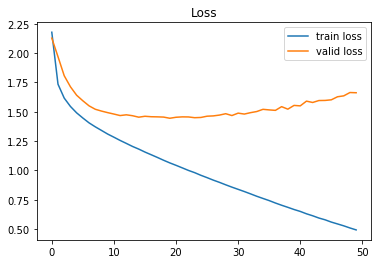

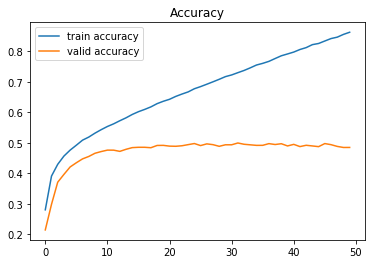

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# Optimizers = Adam, LEARNING_RATE = 1e-3

In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [12]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.1353 - accuracy: 0.9586 - val_loss: 3.1017 - val_accuracy: 0.4728
Epoch 47/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.1201 - accuracy: 0.9647 - val_loss: 3.1452 - val_accuracy: 0.4516
Epoch 48/50
50000/50000 [==============================] - 1s 10us/sample - loss: 0.1200 - accuracy: 0.9639 - val_loss: 2.9906 - val_accuracy: 0.4530
Epoch 49/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.1176 - accuracy: 0.9650 - val_loss: 3.2188 - val_accuracy: 0.4564
Epoch 50/50
50000/50000 [==============================] - 1s 11us/sample - loss: 0.1115 - accuracy: 0.9665 - val_loss: 3.0774 - val_accuracy: 0.4627


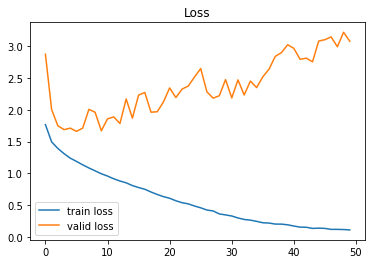

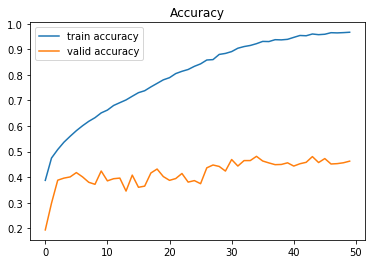

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# # Optimizers = SGD, LEARNING_RATE = 1e-4

In [14]:
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 1s 11us/sample - loss: 1.3783 - accuracy: 0.5199 - val_loss: 1.5954 - val_accuracy: 0.4360
Epoch 47/50
50000/50000 [==============================] - 1s 11us/sample - loss: 1.3725 - accuracy: 0.5228 - val_loss: 1.5918 - val_accuracy: 0.4378
Epoch 48/50
50000/50000 [==============================] - 1s 11us/sample - loss: 1.3674 - accuracy: 0.5235 - val_loss: 1.5880 - val_accuracy: 0.4430
Epoch 49/50
50000/50000 [==============================] - 1s 10us/sample - loss: 1.3624 - accuracy: 0.5263 - val_loss: 1.5866 - val_accuracy: 0.4413
Epoch 50/50
50000/50000 [==============================] - 1s 11us/sample - loss: 1.3576 - accuracy: 0.5274 - val_loss: 1.5846 - val_accuracy: 0.4415


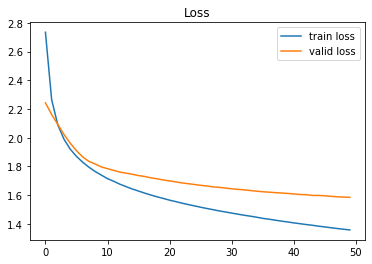

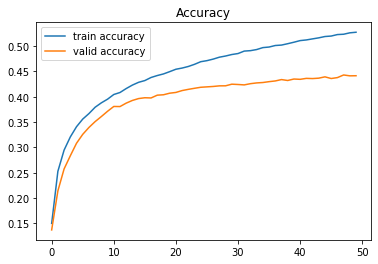

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()